In [1]:
import pandas as pd

from montecarlo import Die, Game, Analyzer

### Scenario 1: A 2-headed coin

- Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.
- Play a game of 1000 flips of 3 coins with all fair dice.
- Play a game of 1000 flips with 2 unfair dice and 1 fair die.
- For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts.
- Compute relative frequency as the number of jackpots over the total number of rolls.
- Show your results, comparing the two relative frequencies, in a simple bar chart.

In [2]:
fair_die = Die(['H','T']) # Fair coin
fair_die.roll_die()
fair_game = Game([fair_die, fair_die, fair_die])
game_num = 1000
fair_game.play_game(game_num)

analyzer = Analyzer(fair_game)
fair_freq = analyzer.jackpot() / game_num
fair_freq

0.229

In [3]:
fair_die_2 = Die(['H','T']) # Fair coin
fair_die_2.roll_die()

unfair_die_3 = Die(['H','T']) 
unfair_die_3.change_weight('H', 5.0)
unfair_die_3.roll_die()

unfair_die_4 = Die(['H','T']) 
unfair_die_4.change_weight('H', 5.0)
unfair_die_4.roll_die()

unfair_game = Game([fair_die_2, unfair_die_3, unfair_die_4])
game_num = 1000
unfair_game.play_game(game_num)

unfair_analyzer = Analyzer(unfair_game)
unfair_freq = unfair_analyzer.jackpot() / game_num
unfair_freq

0.344

([<matplotlib.axis.YTick at 0x7f5319152c70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

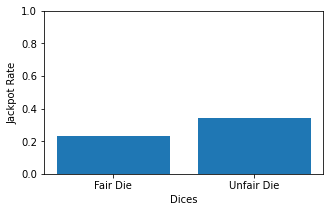

In [4]:
import matplotlib.pyplot as plt
import numpy as np

names = ['Fair Die', 'Unfair Die']
values = [fair_freq, unfair_freq]

plt.figure(figsize=(5,3))

plt.bar(names, values)
plt.ylabel("Jackpot Rate")
plt.xlabel("Dices")
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])

### Scenario 2: A 6-sided die

- Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will  weight 1 five times more than the others.
- Play a game of 10000 rolls with 5 fair dice.
- Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.
- For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.
- Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

### Case 1: 5 Fair Dice

In [5]:
fair = Die(['1','2','3','4','5','6'])
unfair_1 = Die(['1','2','3','4','5','6'])
unfair_2 = Die(['1','2','3','4','5','6'])
unfair_1.change_weight('6', 5.0)
unfair_2.change_weight('1', 5.0)

True

In [6]:
fair.roll_die()
game_1 = Game([fair, fair, fair, fair, fair])
game_num = 10000
game_1.play_game(game_num)

analyzer_1 = Analyzer(game_1)
freq_1 = analyzer_1.jackpot() / game_num
freq_1

0.0006

In [7]:
a = analyzer_1.combo()
top_combos = a.sort_values('Occurrence', ascending = False)[:10]
top_combos

,Combination,Occurrence
0,"[1, 3, 4, 5, 6]",171.0
2,"[1, 2, 3, 5, 6]",162.0
1,"[1, 2, 3, 4, 6]",162.0
3,"[1, 2, 4, 5, 6]",155.0
4,"[1, 2, 3, 4, 5]",154.0
5,"[2, 3, 4, 5, 6]",152.0
6,"[1, 1, 2, 4, 5]",104.0
7,"[1, 3, 4, 4, 6]",93.0
8,"[2, 3, 3, 5, 6]",91.0
9,"[1, 1, 3, 4, 6]",91.0


Text(0, 0.5, 'Occurrence')

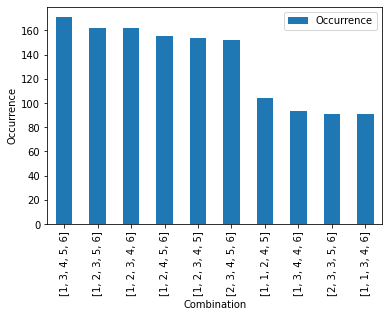

In [8]:
top_combos.plot.bar(x ='Combination', y = 'Occurrence')
plt.ylabel('Occurrence')

### Case 2: 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice

In [9]:
fair.roll_die()
unfair_1.roll_die()
unfair_2.roll_die()
game_2 = Game([fair, fair, unfair_1, unfair_1, unfair_2])
game_num = 10000
game_2.play_game(game_num)
analyzer_2 = Analyzer(game_2)
freq_2 = analyzer_2.jackpot() / game_num
freq_2

0.0007

In [10]:
b = analyzer_2.combo()
top_combos = b.sort_values('Occurrence', ascending = False)[:10]
top_combos

,Combination,Occurrence
0,"[1, 2, 3, 6, 6]",210.0
2,"[1, 3, 5, 6, 6]",210.0
1,"[1, 4, 5, 6, 6]",210.0
3,"[1, 2, 5, 6, 6]",196.0
4,"[1, 3, 4, 6, 6]",190.0
5,"[1, 2, 4, 6, 6]",184.0
6,"[1, 2, 4, 5, 6]",178.0
7,"[1, 2, 3, 5, 6]",177.0
8,"[1, 2, 3, 4, 6]",174.0
9,"[1, 3, 4, 5, 6]",172.0


Text(0, 0.5, 'Occurrence')

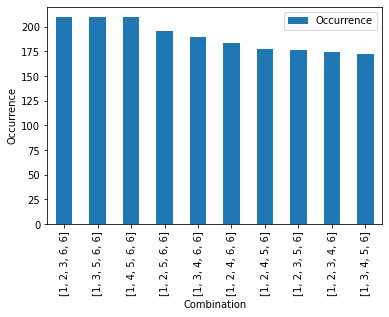

In [11]:
top_combos.plot.bar(x ='Combination', y = 'Occurrence')
plt.ylabel('Occurrence')

### Total Jacpot Rate Results for Both Cases

([<matplotlib.axis.YTick at 0x7f5317b07910>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

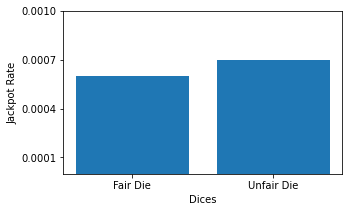

In [12]:
import matplotlib.pyplot as plt
import numpy as np

names = ['Fair Die', 'Unfair Die']
values = [freq_1, freq_2]

plt.figure(figsize=(5,3))

plt.bar(names, values)
plt.ylabel("Jackpot Rate")
plt.xlabel("Dices")
plt.yticks([0.0001, 0.0004, 0.0007, 0.001])

### Scendario 3: Letters of the Roman Alphabet 

- Create a "die" of letters from a to z with weights based on their frequency of usage. See Appendix for these weights.
- Play a game involving 5 of these dice with 1000 rolls.
- How many combos can you that look like actual English words?
- NOTE: "combo" here should really be permutation, which make sense for words. So just compute these from the result data you get from the Game object.
- Based on your eye count, what is the relative frequency of these words versus the rest?
- NOTE: You can do a few random sample to compute your estimate.
- The weights for the letters are in the Appendix to this document.

In [13]:
freqs = pd.read_csv('letter-freqs.csv', sep = '\t')
a_row = []
for ele in list(freqs.columns):
    if len(ele) > 2:
        ele = float(ele)
    a_row.append(ele)
freqs.loc[len(freqs)] = a_row
freqs.columns = ['letter', 'ratio']
freqs = freqs.sort_values(by=['letter'])
freqs.index = np.arange(len(freqs))
freqs = freqs.set_index('letter')
freq_dict = list(freqs.to_dict().values())[0]
freq_dict

{'A': 8.4966,
 'B': 2.072,
 'C': 4.5388,
 'D': 3.3844,
 'E': 11.1607,
 'F': 1.8121,
 'G': 2.4705,
 'H': 3.0034,
 'I': 7.5448,
 'J': 0.1965,
 'K': 1.1016,
 'L': 5.4893,
 'M': 3.0129,
 'N': 6.6544,
 'O': 7.1635,
 'P': 3.1671,
 'Q': 0.1962,
 'R': 7.5809,
 'S': 5.7351,
 'T': 6.9509,
 'U': 3.6308,
 'V': 1.0074,
 'W': 1.2899,
 'X': 0.2902,
 'Y': 1.7779,
 'Z': 0.2722}

In [14]:
from string import ascii_lowercase
alphabets = [c.upper() for c in ascii_lowercase]

In [15]:
alphabet_die = Die(alphabets)
for key in freq_dict:
    alphabet_die.change_weight(key, freq_dict[key])
alphabet_die.df[:5]

,faces,weights
0,A,8.4966
1,B,2.0720
2,C,4.5388
3,D,3.3844
4,E,11.1607


In [16]:
alphabet_die.roll_die()
fair_game = Game([alphabet_die, alphabet_die, alphabet_die, alphabet_die, alphabet_die])
game_num = 1000
fair_game.play_game(game_num)

analyzer = Analyzer(fair_game)

In [17]:
analyzer.jackpot()

0

In [18]:
alpha_combo = analyzer.combo()
alpha_combo

,Combination,Occurrence
0,"[E, E, I, I, R]",3.0
1,"[A, E, H, N, O]",3.0
2,"[E, G, N, O, R]",2.0
3,"[A, E, I, L, R]",2.0
4,"[A, C, L, O, S]",2.0
...,...,...
965,"[A, D, E, N, T]",1.0
966,"[A, F, I, O, Y]",1.0
967,"[B, L, O, R, T]",1.0
968,"[F, G, N, N, U]",1.0


In [19]:
eyeballs = alpha_combo['Combination'][:30]
eyeballs

0     [E, E, I, I, R]
1     [A, E, H, N, O]
2     [E, G, N, O, R]
3     [A, E, I, L, R]
4     [A, C, L, O, S]
5     [A, L, N, O, R]
6     [H, L, O, T, T]
7     [D, I, I, N, U]
8     [C, L, M, N, T]
9     [A, C, G, N, S]
10    [L, L, N, O, R]
11    [D, E, E, N, R]
12    [D, E, I, N, S]
13    [I, N, O, T, Y]
14    [E, L, O, O, R]
15    [C, I, N, R, T]
16    [A, E, I, L, T]
17    [E, E, I, T, U]
18    [A, B, E, I, W]
19    [E, E, I, L, O]
20    [C, I, N, T, U]
21    [E, N, O, O, T]
22    [A, A, E, L, N]
23    [D, E, O, R, T]
24    [E, N, O, R, R]
25    [A, E, O, P, T]
26    [A, A, E, I, R]
27    [E, I, S, T, U]
28    [A, D, E, I, R]
29    [E, E, H, M, Y]
Name: Combination, dtype: object

### Result
: Apparantely, none of the combinations from my 30 samples look like actual words.